# **DATA SCIENCE PARA MATCH DE CURRÍCULOS COM VAGAS DE EMPREGO**

---
## **Importação dos CVs**

In [5]:
!pip install pdfplumber
import pdfplumber
import nltk  

In [6]:
arquivoPDF = pdfplumber.open('Juliana.pdf')
primeira_pagina = arquivoPDF.pages[0]
textoCRU = primeira_pagina.extract_text()
textoCRU

'   \n \nJULIANA SCUDILIO  \n \nRODRIGUES\n  Cientista de Dados \n \n  EDUCAÇÃO \nDoutorado em Estatística - Universidade de São Paulo \n \n2016 – 2020 \nPesquisadora da Capes na área Análise de Sobrevivência/ \nPERFIL \nConfiabilidade, projeto de pesquisa em parceria com o A.C. Camargo \nCenter. Também coordenei um projeto de Credit Scoring com 12 \nSou Estatística, tenho 32 anos, tenho \nalunos para um empresa de São Carlos e fui monitora em duas \nmestrado e doutorado  em Estatística, \ndisciplinas.  \ntenho artigos publicados em revistas \n  \ninternacionais, apresentei trabalhos \nMestre em Estatística - Universidade de São Paulo \nem congressos nacionais e \n2014 - 2016 \ninternacionais. Desenvolvi vários \nPesquisadora da Capes na área de Modelos Preditivos. Projeto \nprojetos e consultorias em análise de \naplicado a fundos de Investimentos do Brasil, dados fornecido pela \ndados durante os anos de estudos. \nempresa Anbima. \nTenho facilidade em aprender novas \n \nhabilidades

In [7]:
arquivoPDF.metadata

{'Producer': 'Microsoft® Word para Microsoft 365',
 'Creator': 'Microsoft® Word para Microsoft 365',
 'CreationDate': "D:20210630101648-03'00'",
 'ModDate': "D:20210630101648-03'00'"}

In [8]:
arquivoPDF.hyperlinks

[{'page_number': 1,
  'object_type': 'annot',
  'x0': 32.3,
  'y0': 245.31,
  'x1': 172.19,
  'y1': 254.36,
  'doctop': 587.56,
  'top': 587.56,
  'bottom': 596.6099999999999,
  'width': 139.89,
  'height': 9.050000000000011,
  'uri': 'http://lattes.cnpq.br/5189010086005005',
  'title': None,
  'contents': None,
  'data': {'Subtype': /'Link',
   'Rect': [32.3, 245.31, 172.19, 254.36],
   'BS': {'W': 0},
   'F': 4,
   'A': {'Type': /'Action',
    'S': /'URI',
    'URI': b'http://lattes.cnpq.br/5189010086005005'},
   'StructParent': 1}},
 {'page_number': 1,
  'object_type': 'annot',
  'x0': 32.3,
  'y0': 198.17,
  'x1': 182.91,
  'y1': 225.22,
  'doctop': 616.6999999999999,
  'top': 616.6999999999999,
  'bottom': 643.75,
  'width': 150.61,
  'height': 27.05000000000001,
  'uri': 'https://www.linkedin.com/in/julianascudilio/',
  'title': None,
  'contents': None,
  'data': {'Subtype': /'Link',
   'Rect': [32.3, 198.17, 182.91, 225.22],
   'BS': {'W': 0},
   'F': 4,
   'A': {'Type': /'Acti

In [9]:
print(textoCRU)

   
 
JULIANA SCUDILIO  
 
RODRIGUES
  Cientista de Dados 
 
  EDUCAÇÃO 
Doutorado em Estatística - Universidade de São Paulo 
 
2016 – 2020 
Pesquisadora da Capes na área Análise de Sobrevivência/ 
PERFIL 
Confiabilidade, projeto de pesquisa em parceria com o A.C. Camargo 
Center. Também coordenei um projeto de Credit Scoring com 12 
Sou Estatística, tenho 32 anos, tenho 
alunos para um empresa de São Carlos e fui monitora em duas 
mestrado e doutorado  em Estatística, 
disciplinas.  
tenho artigos publicados em revistas 
  
internacionais, apresentei trabalhos 
Mestre em Estatística - Universidade de São Paulo 
em congressos nacionais e 
2014 - 2016 
internacionais. Desenvolvi vários 
Pesquisadora da Capes na área de Modelos Preditivos. Projeto 
projetos e consultorias em análise de 
aplicado a fundos de Investimentos do Brasil, dados fornecido pela 
dados durante os anos de estudos. 
empresa Anbima. 
Tenho facilidade em aprender novas 
 
habilidades e lidar com pessoas. Fiz  Bachare

---
## **Pré-processamento de Texto**

In [10]:
# A função word_tokenize() quebra o texto em palavras individuais.
nltk.download('punkt')
lista_de_palavras = nltk.tokenize.word_tokenize(textoCRU)
lista_de_palavras

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\igorf\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['JULIANA',
 'SCUDILIO',
 'RODRIGUES',
 'Cientista',
 'de',
 'Dados',
 'EDUCAÇÃO',
 'Doutorado',
 'em',
 'Estatística',
 '-',
 'Universidade',
 'de',
 'São',
 'Paulo',
 '2016',
 '–',
 '2020',
 'Pesquisadora',
 'da',
 'Capes',
 'na',
 'área',
 'Análise',
 'de',
 'Sobrevivência/',
 'PERFIL',
 'Confiabilidade',
 ',',
 'projeto',
 'de',
 'pesquisa',
 'em',
 'parceria',
 'com',
 'o',
 'A.C.',
 'Camargo',
 'Center',
 '.',
 'Também',
 'coordenei',
 'um',
 'projeto',
 'de',
 'Credit',
 'Scoring',
 'com',
 '12',
 'Sou',
 'Estatística',
 ',',
 'tenho',
 '32',
 'anos',
 ',',
 'tenho',
 'alunos',
 'para',
 'um',
 'empresa',
 'de',
 'São',
 'Carlos',
 'e',
 'fui',
 'monitora',
 'em',
 'duas',
 'mestrado',
 'e',
 'doutorado',
 'em',
 'Estatística',
 ',',
 'disciplinas',
 '.',
 'tenho',
 'artigos',
 'publicados',
 'em',
 'revistas',
 'internacionais',
 ',',
 'apresentei',
 'trabalhos',
 'Mestre',
 'em',
 'Estatística',
 '-',
 'Universidade',
 'de',
 'São',
 'Paulo',
 'em',
 'congressos',
 'nacionais'

In [11]:
# Padronizando as palavras em lowercase (apenas letras minúsculas)
lista_de_palavras = [palavra.lower() for palavra in lista_de_palavras]
lista_de_palavras

['juliana',
 'scudilio',
 'rodrigues',
 'cientista',
 'de',
 'dados',
 'educação',
 'doutorado',
 'em',
 'estatística',
 '-',
 'universidade',
 'de',
 'são',
 'paulo',
 '2016',
 '–',
 '2020',
 'pesquisadora',
 'da',
 'capes',
 'na',
 'área',
 'análise',
 'de',
 'sobrevivência/',
 'perfil',
 'confiabilidade',
 ',',
 'projeto',
 'de',
 'pesquisa',
 'em',
 'parceria',
 'com',
 'o',
 'a.c.',
 'camargo',
 'center',
 '.',
 'também',
 'coordenei',
 'um',
 'projeto',
 'de',
 'credit',
 'scoring',
 'com',
 '12',
 'sou',
 'estatística',
 ',',
 'tenho',
 '32',
 'anos',
 ',',
 'tenho',
 'alunos',
 'para',
 'um',
 'empresa',
 'de',
 'são',
 'carlos',
 'e',
 'fui',
 'monitora',
 'em',
 'duas',
 'mestrado',
 'e',
 'doutorado',
 'em',
 'estatística',
 ',',
 'disciplinas',
 '.',
 'tenho',
 'artigos',
 'publicados',
 'em',
 'revistas',
 'internacionais',
 ',',
 'apresentei',
 'trabalhos',
 'mestre',
 'em',
 'estatística',
 '-',
 'universidade',
 'de',
 'são',
 'paulo',
 'em',
 'congressos',
 'nacionais'

In [12]:
#Criando uma lista que contém pontuação que desejamos remover
pontuacao = ['(',')',';',':','[',']',',']

In [13]:
#Criando uma lista de stop words "a", "de", "um"que não tem valor como palavra
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('portuguese')
stop_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\igorf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['de',
 'a',
 'o',
 'que',
 'e',
 'é',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'não',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 'à',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'já',
 'eu',
 'também',
 'só',
 'pelo',
 'pela',
 'até',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'você',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'às',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'nós',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'vocês',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 'aquela',
 'aqueles',
 'aquelas',
 'isto',
 'aquilo',
 'estou',
 'está',
 'estamos',
 'estão',
 'estive',
 'esteve',
 'estivemos',
 'estiveram',
 'estava',
 'estávamos',
 'estavam',
 'estivera'

In [14]:
#criando uma lista de palavra sem stopword e pontuações
keywords = [palavra for palavra in lista_de_palavras if not palavra in stop_words and not palavra in pontuacao]
keywords

['juliana',
 'scudilio',
 'rodrigues',
 'cientista',
 'dados',
 'educação',
 'doutorado',
 'estatística',
 '-',
 'universidade',
 'paulo',
 '2016',
 '–',
 '2020',
 'pesquisadora',
 'capes',
 'área',
 'análise',
 'sobrevivência/',
 'perfil',
 'confiabilidade',
 'projeto',
 'pesquisa',
 'parceria',
 'a.c.',
 'camargo',
 'center',
 '.',
 'coordenei',
 'projeto',
 'credit',
 'scoring',
 '12',
 'estatística',
 '32',
 'anos',
 'alunos',
 'empresa',
 'carlos',
 'monitora',
 'duas',
 'mestrado',
 'doutorado',
 'estatística',
 'disciplinas',
 '.',
 'artigos',
 'publicados',
 'revistas',
 'internacionais',
 'apresentei',
 'trabalhos',
 'mestre',
 'estatística',
 '-',
 'universidade',
 'paulo',
 'congressos',
 'nacionais',
 '2014',
 '-',
 '2016',
 'internacionais',
 '.',
 'desenvolvi',
 'vários',
 'pesquisadora',
 'capes',
 'área',
 'modelos',
 'preditivos',
 '.',
 'projeto',
 'projetos',
 'consultorias',
 'análise',
 'aplicado',
 'fundos',
 'investimentos',
 'brasil',
 'dados',
 'fornecido',
 'd

In [15]:
#numero de palavras das reviews
len(keywords)

354

In [16]:
# concatenar as palavras
textocv = " ".join(s for s in keywords)
textocv

'juliana scudilio rodrigues cientista dados educação doutorado estatística - universidade paulo 2016 – 2020 pesquisadora capes área análise sobrevivência/ perfil confiabilidade projeto pesquisa parceria a.c. camargo center . coordenei projeto credit scoring 12 estatística 32 anos alunos empresa carlos monitora duas mestrado doutorado estatística disciplinas . artigos publicados revistas internacionais apresentei trabalhos mestre estatística - universidade paulo congressos nacionais 2014 - 2016 internacionais . desenvolvi vários pesquisadora capes área modelos preditivos . projeto projetos consultorias análise aplicado fundos investimentos brasil dados fornecido dados durante anos estudos . empresa anbima . facilidade aprender novas habilidades lidar pessoas . fiz bacharel estatística - universidade federal carlos vários cursos onlines machine 2010 – 2013 learning big data power bi iniciação científica cnpq área análise programação . pessoa pró- sobrevivência/confiabilidade projeto parc

---
## **WordCloud - Nuvem de Palavras**

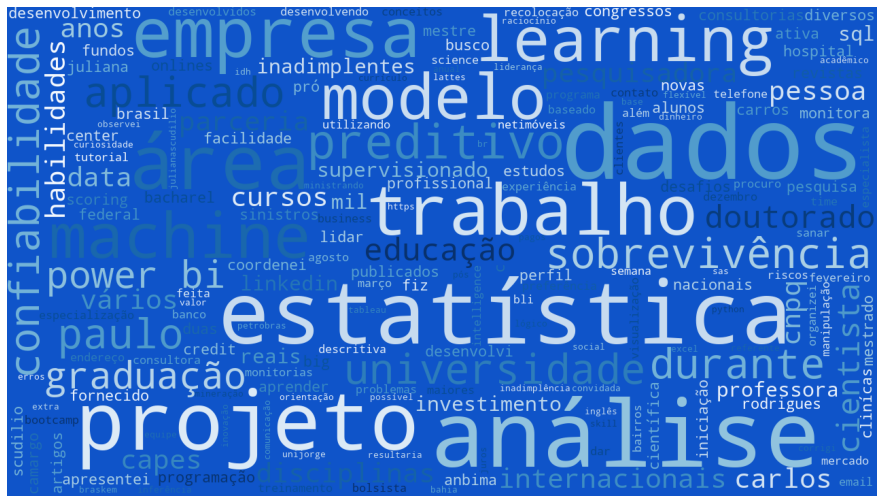

In [17]:
# gerar uma wordcloud

from wordcloud import WordCloud

wordcloud = WordCloud(background_color = '#0f54c9', 
                      max_font_size = 150, 
                      width = 1280, 
                      height = 720, 
                      colormap= 'Blues').generate(textocv) 

# mostrar a imagem final
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16, 9))
ax.imshow(wordcloud)
ax.set_axis_off()
plt.imshow(wordcloud)
wordcloud.to_file("wordcloud.png")
plt.show()

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def NuvemDePalavras(cv, salvar = True):
    '''
    cv: caminho de um arquivo PDF 
    '''
    arquivoPDF = pdfplumber.open(cv)
    primeira_pagina = arquivoPDF.pages[0]  #lê apenas a primeira página
    textoCRU = primeira_pagina.extract_text()

    lista_de_palavras = nltk.tokenize.word_tokenize(textoCRU)  # transforma o texto cru em uma lista de termos
    lista_de_palavras = [palavra.lower() for palavra in lista_de_palavras]  # deixando tudo minusculo

    keywords = [palavra for palavra in lista_de_palavras if not palavra in stop_words and not palavra in pontuacao]  # tira as pontuacoes e stopwords 
    textocv = " ".join(s for s in keywords)  # junta tudo em um texto só novamente. 


    wordcloud = WordCloud(background_color = '#0f54c9', 
                          max_font_size = 150, 
                          width = 1280, 
                          height = 720, 
                          colormap= 'Blues').generate(textocv) 
 
    # mostrar a imagem final
    fig, ax = plt.subplots(figsize=(16, 9))
    ax.imshow(wordcloud)
    ax.set_axis_off()
    plt.imshow(wordcloud)

    if salvar:
        wordcloud.to_file("wordcloud.png")

    plt.show()


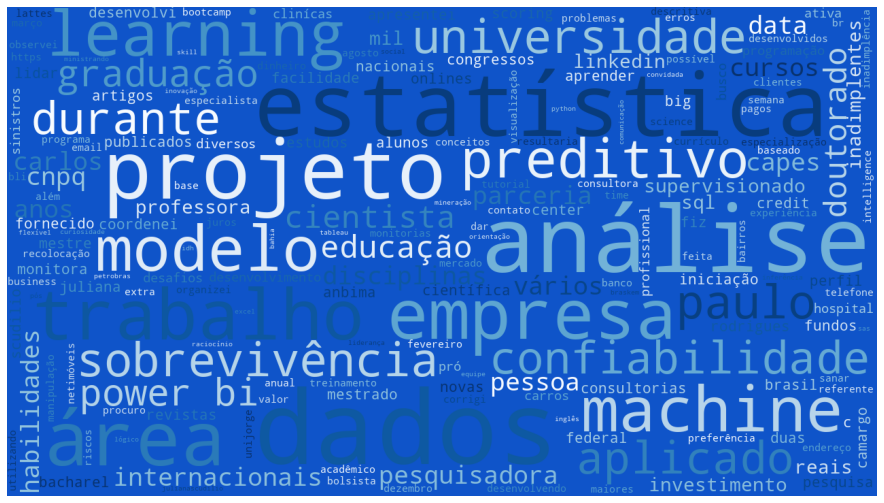

In [19]:
NuvemDePalavras('Juliana.pdf')

---
## **Entrada das Vagas de Emprego**

- **Vaga 1 - DS Senior:** https://www.linkedin.com/jobs/view/2592718801/?alternateChannel=search&refId=HcViZqV2vjZAXA0OvOZrjQ%3D%3D&trackingId=6n427gmxJ%2BH5bnRHI0T5Lg%3D%3D
- **Vaga 2 - DS Junior:** https://www.linkedin.com/jobs/view/2621616275/?alternateChannel=search&refId=I4M3V3mzbgz5oU5EfgwJxw%3D%3D&trackingId=4gDNWcSbeeVhAr15Vs2kaA%3D%3D
- **Vaga 3 - Engenheiro de Dados:** https://www.linkedin.com/jobs/view/2596248068/?alternateChannel=search&refId=sI8VCh%2FcadPug6NsBop4sA%3D%3D&trackingId=uMjFL1VlttYcK4XiXkcToA%3D%3D 
- **Vaga 4 - Marketing:**  https://www.linkedin.com/jobs/view/2601831935/?alternateChannel=search&refId=J6jCHp9UlXvGcv2qAD132w%3D%3D&trackingId=cZ4J1BVrDvBhutTRklbPPw%3D%3D

In [20]:
import pandas as pd

vagas = pd.read_excel('vagas.xlsx', sheet_name = None)

In [21]:
n_vagas = len(vagas.keys())
nome_vagas = list(vagas.keys())

In [22]:
# transformando a saida numa lista de dataframes (cada dataframe representa uma vaga)
vagas = [vagas[nome_vagas[i]] for i in range(n_vagas)]

In [23]:
vagas[0]

,palavras-chave,pesos
0,python,1
1,sql,1
2,linguagem r,1
3,machine learning,2
4,estatística,2
5,big data,2
6,negócio,2


In [24]:
vaga1 = vagas[0]
vaga1

,palavras-chave,pesos
0,python,1
1,sql,1
2,linguagem r,1
3,machine learning,2
4,estatística,2
5,big data,2
6,negócio,2


In [25]:
palavras_chaves = list(vaga1['palavras-chave'])
palavras_chaves

['python',
 'sql',
 'linguagem r',
 'machine learning',
 'estatística',
 'big data',
 'negócio']

In [26]:
# Clear Sale Data Science Analytics Senior
import numpy as np

limite = 5
  
pesos = list(vaga1['pesos'])
palavras_chaves = list(vaga1['palavras-chave'])
pmax = np.sum(np.array(pesos) * limite)
print(pmax) 

55


In [27]:
# contando as palavras chaves que ocorrem no CV

cont = [textocv.count(pc) for pc in palavras_chaves]
cont

[1, 2, 0, 2, 8, 1, 0]

In [28]:
# limitar pelo threshold
def aux(x):
    return x if x <= limite else limite

cont = [aux(i) for i in cont]
cont

[1, 2, 0, 2, 5, 1, 0]

In [29]:
score = ((np.array(cont) * pesos).sum()/pmax).round(4)
score

0.3455

---
## **Match dos CVs com as Vagas**

In [30]:
# função entrada: CV saida, vaga - saida: score

pontuacao = ['(', ')', ';', ':', '[', ']', ',']
stop_words = nltk.corpus.stopwords.words('portuguese')

def MatchCV(cv, vaga, limite = 5):
    '''
    cv: caminho de um arquivo PDF
    vaga: dataset de palavras-chave e pesos
    '''

    arquivoPDF = pdfplumber.open(cv)
    primeira_pagina = arquivoPDF.pages[0]  #lê apenas a primeira página
    textoCRU = primeira_pagina.extract_text()

    lista_de_palavras = nltk.tokenize.word_tokenize(textoCRU)  # transforma o texto cru em uma lista de termos
    lista_de_palavras = [palavra.lower() for palavra in lista_de_palavras]  # deixando tudo minusculo

    keywords = [palavra for palavra in lista_de_palavras if not palavra in stop_words and not palavra in pontuacao]  # tira as pontuacoes e stopwords 
    textocv = " ".join(s for s in keywords)  # junta tudo em um texto só novamente. 

    pesos = list(vaga['pesos'])
    palavras_chaves = list(vaga['palavras-chave'])

    cont = [textocv.count(pc) for pc in palavras_chaves]  # conta quantas vezes cada termo da vaga aparece no texto do cv

    def aux(x, limite):
        return x if x <= limite else limite

    cont = [aux(i, limite) for i in cont]   # coloca o limite na contagem de palavras

    pmax = np.sum(np.array(pesos) * limite) 

    score = ((np.array(cont) * pesos).sum()/pmax).round(4)

    return score

In [31]:
MatchCV('Juliana.pdf', vagas[2])

0.05

In [35]:
lista_de_vagas = vagas

lista_de_cvs = ['Igor.pdf',
                'Juliana.pdf']


In [36]:
lista_de_vagas[0]

,palavras-chave,pesos
0,python,1
1,sql,1
2,linguagem r,1
3,machine learning,2
4,estatística,2
5,big data,2
6,negócio,2


In [37]:
# Lista de Listas, cada lista interna é score de uma pessoa nas vagas
pessoas = [[MatchCV(cv, vaga) for vaga in lista_de_vagas] for cv in lista_de_cvs]
pessoas

[[0.0364, 0.0, 0.0333, 0.02], [0.3455, 0.375, 0.05, 0.14]]

In [38]:
# filtro para pegar apenas os nomes das pessoas na lista de caminhos
nomes = [cv.split('/')[-1].split('.')[0] for cv in lista_de_cvs]

In [39]:
# Conjunto de dados comos matches das pessoas com as vagas
matchs = pd.DataFrame(pessoas, columns = nome_vagas, index = nomes)

In [40]:
matchs.sort_values(by = 'eng_dados', ascending = False)

,ds_senior,ds_junior,eng_dados,marketing
Juliana,0.3455,0.375,0.0500,0.14
Igor,0.0364,0.000,0.0333,0.02
